In [ ]:
# Import necessary library
import pandas as pd # data manipulation
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data avisualization
from scipy.stats import ttest_ind # ttest to compare sample means

%matplotlib inline

In [ ]:
# read .csv file
path = '/content/Tinder Millennial Match Rate Dataset.csv'
df = pd.read_csv('/content/Tinder Millennial Match Rate Dataset.csv')

In [ ]:
# print first 5 rows
df.head()

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
1,292883,Mobile,Mobile respondents,No,1969,0.511,No
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
4,292889,Web,Web-based respondents,No,0,0.000,No


In [ ]:
# print data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        453 non-null    int64  
 1   Segment Type              453 non-null    object 
 2   Segment Description       453 non-null    object 
 3   Answer                    453 non-null    object 
 4   Count                     453 non-null    int64  
 5   Percentage                453 non-null    float64
 6   It became a Relationship  453 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 24.9+ KB


In [ ]:
# print summary statistics
df.describe()

,ID,Count,Percentage
count,453.000000,453.000000,453.000000
mean,293333.000000,22.373068,0.331141
std,261.828188,136.996075,0.316157
min,292881.000000,0.000000,0.000000
25%,293107.000000,0.000000,0.000000
50%,293333.000000,1.000000,0.250000
75%,293559.000000,4.000000,0.500000
max,293785.000000,1969.000000,1.000000


In [ ]:
df.corr()

,ID,Count,Percentage,It became a Relationship
ID,1.000000,-0.239849,0.011680,-0.004851
Count,-0.239849,1.000000,0.033472,0.033861
Percentage,0.011680,0.033472,1.000000,0.077366
It became a Relationship,-0.004851,0.033861,0.077366,1.000000


In [ ]:
df.shape

(453, 7)

In [ ]:
# Investigate unique values in categorical columns
cat_col = ['Segment Type', 'Segment Description', 'Answer', 'It became a Relationship']
for col in cat_col:
    print('Unique values in "{}" column count: {}'.format(col, df[col].nunique()))
    print(df[col].unique())
    print('-'*30)

Unique values in "Segment Type" column count: 4
['Mobile' 'Web' 'Gender' 'University']
------------------------------
Unique values in "Segment Description" column count: 151
['Mobile respondents' 'Web-based respondents' 'Male respondents'
 'Female respondents' 'Chapman University' 'Cornell University'
 'Duke University' 'George Washington University' 'Georgetown University'
 'Harvard University' 'Indiana University' 'Johns Hopkins University'
 'Northwestern University' 'Ohio State University' 'Princeton University'
 'San Diego State University' 'Santa Clara University'
 'Southern Methodist University' 'Stanford University' 'Tulane University'
 'University of Pennsylvania' 'University of Wisconsin-Madison'
 'University of Alabama' 'University of California, Berkeley'
 'University of California, Davis' 'University of California, Los Angeles'
 'University of California, Santa Barbara'
 'University of Colorado Boulder' 'University of Miami'
 'University of Michigan' 'University of Oregon'

In [ ]:
# Convert 'It became a relationship' column into boolean
dict = {'Yes':1, 'No':0} # create a dictionary to map new values
df['It became a Relationship'] = df['It became a Relationship'].map(dict) # apply mapping of values
df['It became a Relationship'] = df['It became a Relationship'].astype(bool) # change data type

In [ ]:
# 'Segement type' unique value counts
df['Segment Type'].value_counts()

University    441
Gender          6
Mobile          3
Web             3
Name: Segment Type, dtype: int64

In [ ]:
# 'Segment Description' unique value counts
df['Segment Description'].value_counts(ascending=True)

Mobile respondents                    3
Marquette University                  3
James Madison University              3
Sacred Heart University               3
University of Wisconsin-Whitewater    3
                                     ..
University of Washington              3
University of Illinois                3
New York University                   3
Washington University in St. Louis    3
Boston University                     3
Name: Segment Description, Length: 151, dtype: int64

In [ ]:
# 'Answer' Column unique value counts
df['Answer'].value_counts()

Yes                   151
No                    151
I don't use Tinder    151
Name: Answer, dtype: int64

In [ ]:
# Mean and median by answer groups
df.groupby('Answer')[['Count', 'Percentage']].agg(['mean','median'])

Count        Percentage       
                         mean median       mean median
Answer                                                
I don't use Tinder  18.410596    1.0   0.228305  0.200
No                  34.615894    2.0   0.517305  0.500
Yes                 14.092715    1.0   0.247815  0.192

In [ ]:
# 'Success' indiciator
df['It became a Relationship'].value_counts()

False    323
True     130
Name: It became a Relationship, dtype: int64

In [ ]:
# function to plot ecdf, which will help understand distribution of variables
def plot_ecdf(data, col, log_scale=False, plot_norm=False):  
    x = np.sort(data[col])
    x_norm = np.sort(np.random.normal(data[col].mean(), data[col].std(), len(data[col])))
    y = np.sort(np.arange(1, len(data[col])+1)/(len(data[col] + 1)))

    sns.set_style('darkgrid')
    plt.figure(figsize=(14,6))
    sns.scatterplot(x=x, y=y, label=col, alpha = 0.5)
    plt.title('ECDF of {}'.format(col))
    plt.xlabel(col)
    
    if plot_norm==True:
        sns.scatterplot(x=x_norm, y=y, label='Normal distribution', alpha = 0.5)
    
    if log_scale==True:
        plt.xscale('log')

(-10.0, 110.0)

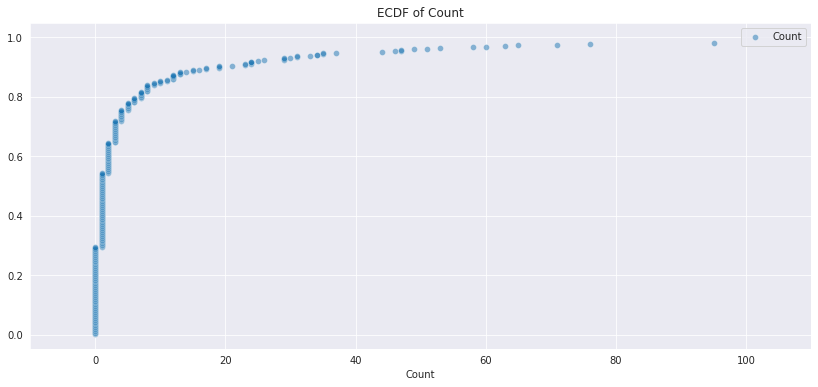

In [ ]:
# examine 'Count' column:
plot_ecdf(df,'Count', False, False)
plt.xlim(-10,110)

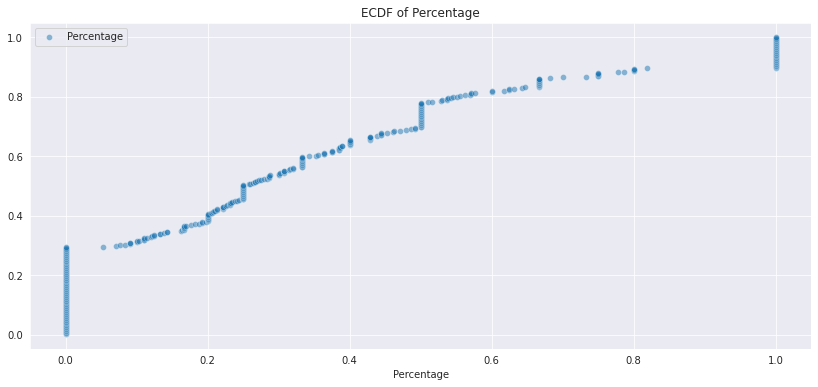

In [ ]:
# examine 'Percentage' column:
plot_ecdf(df,'Percentage', False, False)

In [ ]:
# 'It became a Relationship'
df.value_counts('It became a Relationship')

It became a Relationship
False    323
True     130
dtype: int64

In [ ]:
# Calcualate mean and median number of match percentage and match count 
df.loc[:, df.columns != 'ID'].groupby('Answer')[['Count', 'Percentage']].agg(['mean', 'median'])

Count        Percentage       
                         mean median       mean median
Answer                                                
I don't use Tinder  18.410596    1.0   0.228305  0.200
No                  34.615894    2.0   0.517305  0.500
Yes                 14.092715    1.0   0.247815  0.192

In [ ]:
# Calcualate mean and median number of match percentage and count 
df.loc[:, df.columns != 'ID'].groupby('It became a Relationship').agg(['mean', 'median'])

Count        Percentage       
                               mean median       mean median
It became a Relationship                                    
False                     19.433437    1.0   0.315641  0.250
True                      29.676923    1.0   0.369654  0.305

Text(0.5, 1.0, 'Boxplot of match counts')

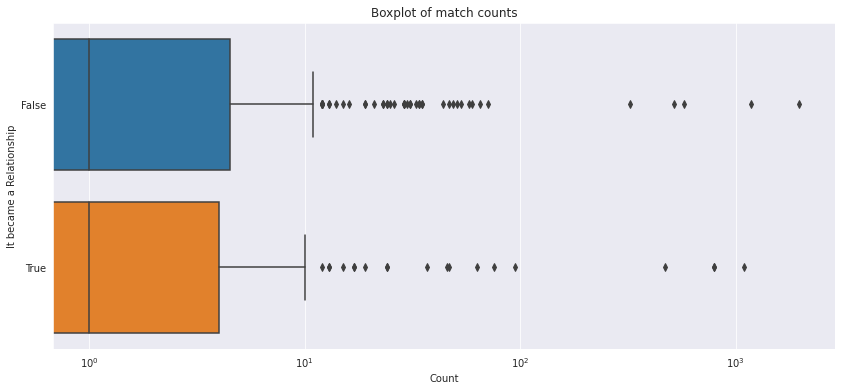

In [ ]:
# Boxplot of match count 
plt.figure(figsize=(14,6))
sns.boxplot(x=df['Count'], y=df['It became a Relationship'].astype('category'))
plt.xscale('log')
plt.title('Boxplot of match counts')

Text(0.5, 1.0, 'Boxplot of percentage counts')

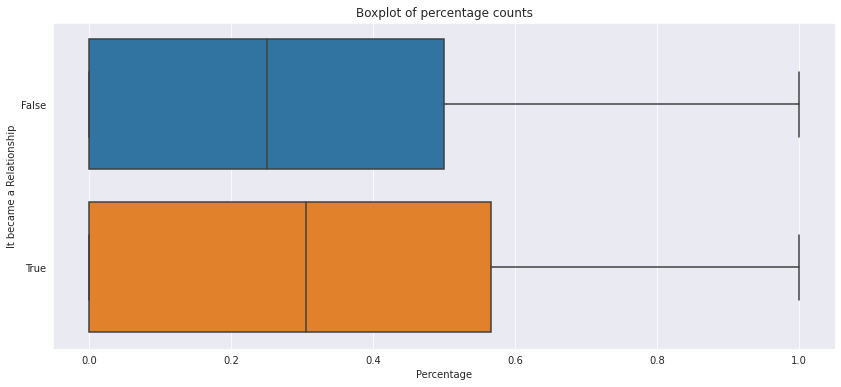

In [ ]:
# Boxplot of match Percentage 
plt.figure(figsize=(14,6))
sns.boxplot(x=df['Percentage'], y=df['It became a Relationship'].astype('category'))
plt.title('Boxplot of percentage counts')

In [ ]:
# Function to calcaulte difference of a function (ex. mean)
def diff_func(data_1, data_2, func=np.mean):
    difference = func(data_1) - func(data_2)
    return difference

In [ ]:
# Function to grab column value to compare for those found relationship in tinder versus not 
def initial_sample(df=df, col_to_compare='Percentage'):
    rel_yes = df[df['It became a Relationship']][col_to_compare]
    rel_no = df[df['It became a Relationship']!=True][col_to_compare]
    return rel_yes, rel_no

In [ ]:
# Create bootstrapped samples using permutation
def permutation_sample(data1, data2):
    
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    
    permuted_data1 = permuted_data[:len(data1)]
    permuted_data2 = permuted_data[len(data1):]
    
    return permuted_data1, permuted_data2

In [ ]:
# Conduct null hypothesis test with bootstrapped samples
def bootstrap_testing(df, col_to_compare, func, size=1):
    data1, data2 = initial_sample(df, col_to_compare)
    difference = diff_func(data1, data2, func)
    
    sample_stat = [] # initialize a list to store bootstrapped sample statistics
    
    for i in range(size):
        permuted_data1, permuted_data2 = permutation_sample(data1, data2)
        permuted_diff = diff_func(permuted_data1, permuted_data2, func)
        sample_stat.append(permuted_diff)
    
    sample_stat = np.array(sample_stat)
    
    plt.figure(figsize=(14,8))
    ax = sns.histplot(sample_stat)
    ax.axvline(difference, linestyle='--', color='red')
    plt.title('Distribution of bootstraped sample stat versus original sample stat (dashed)')
    
    pval = np.sum(difference <= sample_stat)/len(sample_stat)
    print('Test result : p-value of {}'.format(pval))
    return pval

Test result : p-value of 0.049


0.049

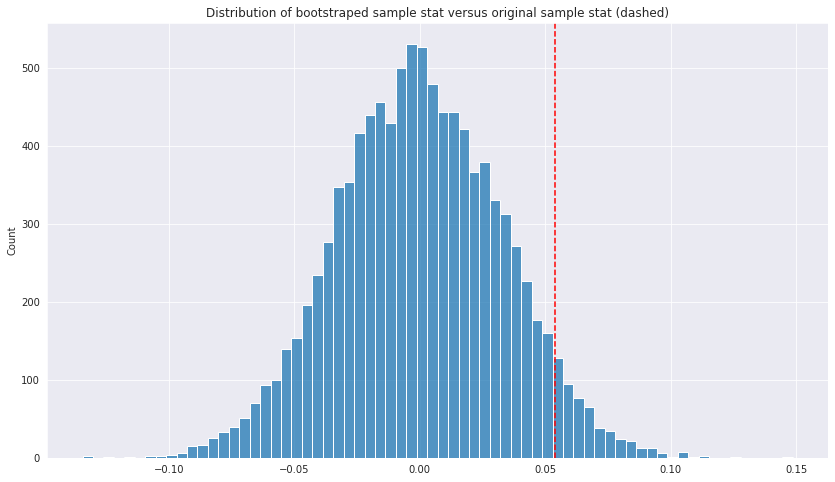

In [ ]:
# Perform the test with 10000 iterations on difference in mean of 'percentage' for those who found relationship in tinder versus those who did not 
np.random.seed(5)
bootstrap_testing(df=df, col_to_compare='Percentage', func=np.mean, size=10000)

Test result : p-value of 0.0638


0.0638

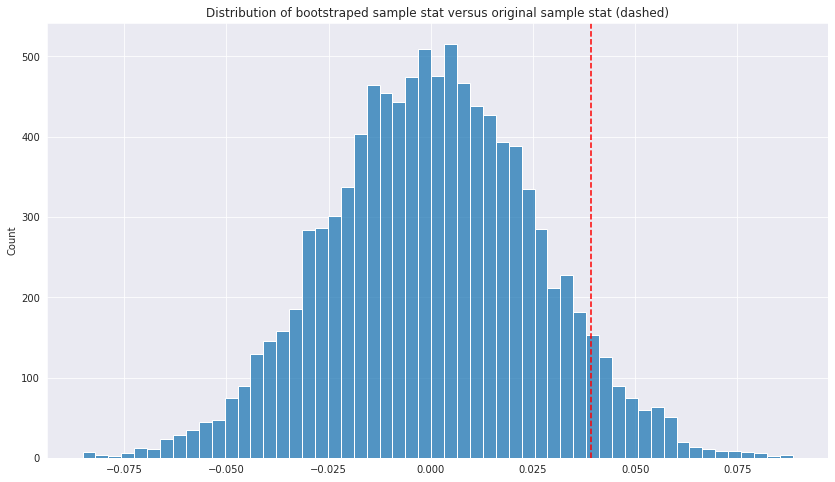

In [ ]:
# Perform the test with 10000 iterations on difference in mean of 'percentage' for those who found relationship in tinder versus those who did not 
# This time subset for those used tinder more frequently
frequent_user = df[(df['Count']>0)&(df['Percentage']<1)]

np.random.seed(5)
bootstrap_testing(df=frequent_user, col_to_compare='Percentage', func=np.mean, size=10000)

Test result : p-value of 0.2351


0.2351

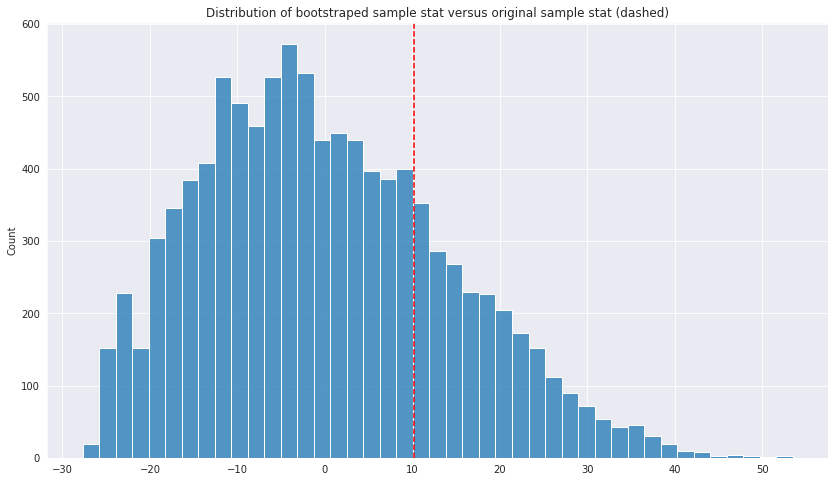

In [ ]:
# Perform the test with 10000 iterations on difference in mean of tinder match counts for those who found relationship in tinder versus those who did not 
np.random.seed(5)
bootstrap_testing(df=df, col_to_compare='Count', func=np.mean, size=10000)

Test result : p-value of 0.1641


0.1641

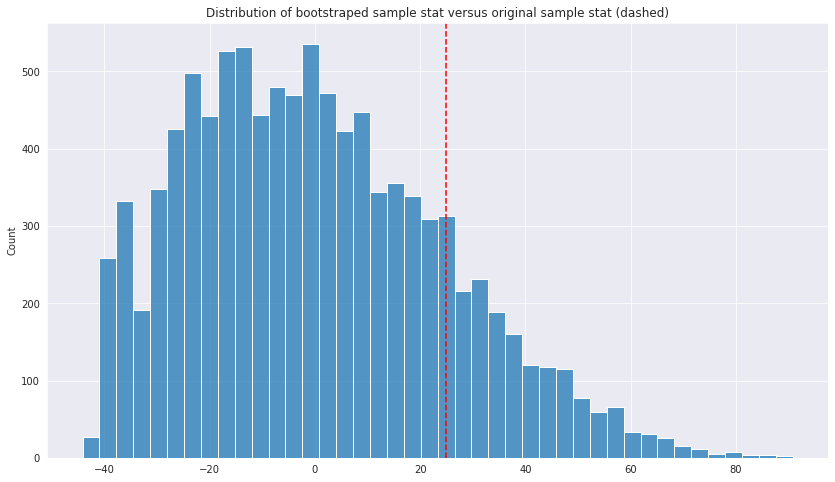

In [ ]:
# Perform the test with 10000 iterations on difference in mean of tinder match counts for those who found relationship in tinder versus those who did not 
# Subset only for frequent users

np.random.seed(5)
bootstrap_testing(df=frequent_user, col_to_compare='Count', func=np.mean, size=10000)